Import Libraries

In [2]:
# Import libraries

import unittest
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load  the dataset

data="C:/Users/b1202001/OneDrive - Teesside University/Software for Digital Innovation/MY ICA/B1202001_Babalola_Ayooluwa/Source/Covid19/specimenDate_ageDemographic-unstacked.csv"
df=pd.read_csv(data)
df.head(5)

areaType   areaCode    areaName        date  newCasesBySpecimenDate-0_4  \
0     ltla  E06000001  Hartlepool  2020-03-16                           0   
1     ltla  E06000001  Hartlepool  2020-03-17                           0   
2     ltla  E06000001  Hartlepool  2020-03-18                           0   
3     ltla  E06000001  Hartlepool  2020-03-19                           0   
4     ltla  E06000001  Hartlepool  2020-03-20                           0   

   newCasesBySpecimenDate-0_59  newCasesBySpecimenDate-10_14  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   newCasesBySpecimenDate-15_19  newCasesBySpecimenDate-20_24  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   newCasesBySpecimenDate-25_29  ...  newCasesBySpecimenDateRollingSum-5_9  \
0                             0  ...                                     0   
1                             0  ...                                     0   
2                             0  ...                                     0   
3                             0  ...                                     0   
4                             0  ...                                     0   

   newCasesBySpecimenDateRollingSum-60+  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   newCasesBySpecimenDateRollingSum-60_64  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-65_69  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-70_74  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-75_79  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-80_84  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-85_89  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   newCasesBySpecimenDateRollingSum-90+  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   newCasesBySpecimenDateRollingSum-unassigned  
0                                            0  
1                                            0  
2  

**PROCESSING**

First extract the unique columns based on newCasesBySpecimenDate- which is the column newCasesBySpecimenDate-0_59 and newCasesBySpecimenDate-60+, the addition of this two columns give the total number of cases per day 

In [ ]:
newCasesBySpecimenDate=df[['areaName','date','newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+']]
newCasesBySpecimenDate['Total cases']=newCasesBySpecimenDate.sum(axis=1)

# Respective Months and Week can also be Extracted for the newCasesBySpecimenDate df

newCasesBySpecimenDate['date']=newCasesBySpecimenDate['date'].astype('datetime64[ns]')
newCasesBySpecimenDate['months']=newCasesBySpecimenDate['date'].dt.month
newCasesBySpecimenDate['weeks']=newCasesBySpecimenDate['date'].dt.week


Top 5 Areas with the highest number of cases from 2020-03-16 to 2020-11-01 with age_group distribution

In [4]:
def plot2():
  newCasesBySpecimenDate.groupby('areaName')['Total cases','newCasesBySpecimenDate-0_59','newCasesBySpecimenDate-60+' ].sum().sort_values('Total cases', ascending=False).head(5)\
  .plot(kind='bar', color= ['green', 'blue', 'orange'], figsize=(15,7))
  plt.xlabel('AreaName')
  plt.ylabel('Total cases')
  plt.title('Top 5 Areas with the highest number of cases from 2020-03-16 to 2020-11-01 with age_group distribution')
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
.
----------------------------------------------------------------------
Ran 1 test in 0.273s

OK


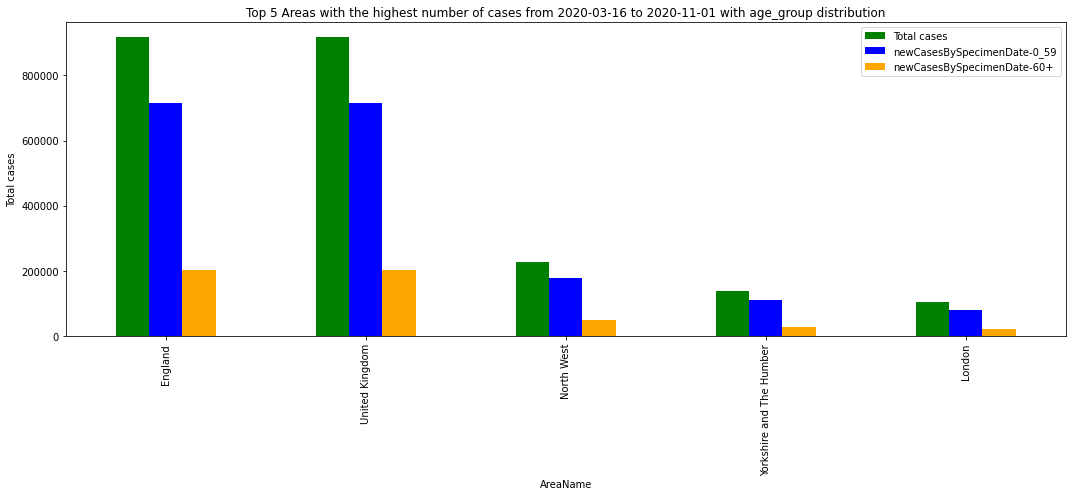

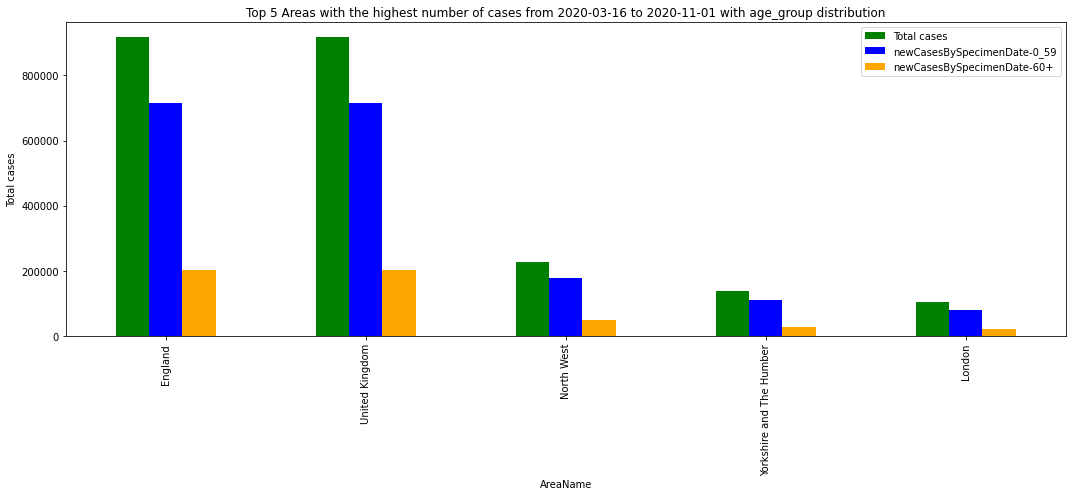

In [6]:
# Unit Testing

class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot2() is plot2()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Top 3 Areas with the lowest of cases from 2020-03-16 to 2020-11-01 alongside age_distribution

In [7]:
def plot3():
  newCasesBySpecimenDate.groupby('areaName')['Total cases','newCasesBySpecimenDate-0_59','newCasesBySpecimenDate-60+' ].sum().sort_values('Total cases', ascending=False).tail(3)\
  .plot(kind='bar', color= ['green', 'blue', 'orange'], figsize=(15,7))
  plt.xlabel('AreaName')
  plt.ylabel('Total cases')
  plt.title('Top 3 Areas with the lowest of cases from 2020-03-16 to 2020-11-01 alongside age_distribution')
  plt.tight_layout()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
.
----------------------------------------------------------------------
Ran 1 test in 0.223s

OK


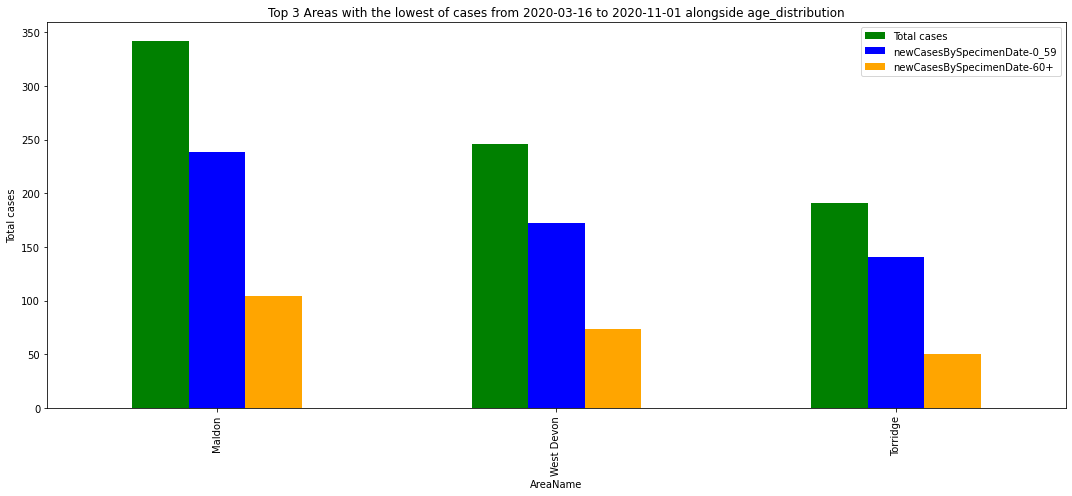

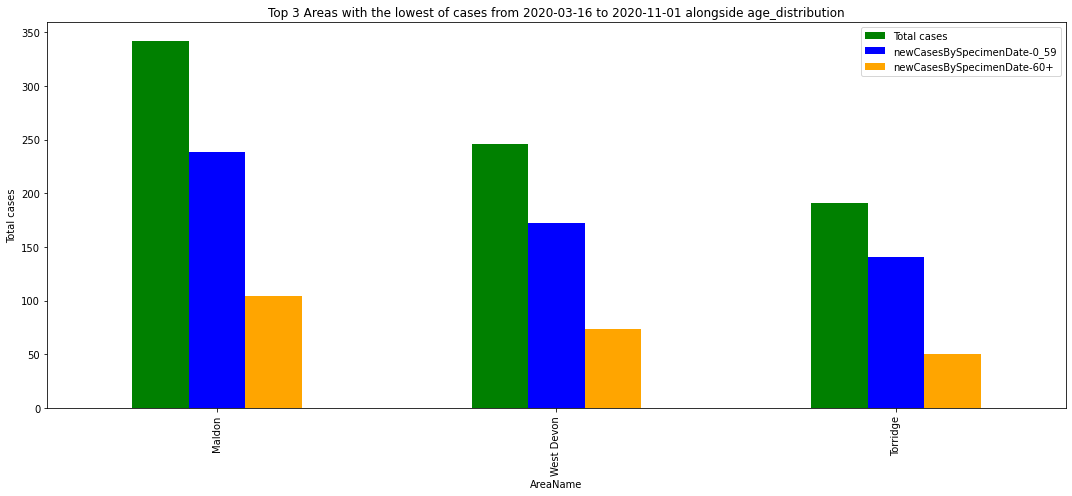

In [8]:
# Unit Testing

class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot3() is plot3()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Pie chart showing Comparison of Total cases per month

In [9]:
def plot4():
  newCasesBySpecimenDate.groupby('months')['Total cases'].sum().to_frame().plot(kind='pie',y='Total cases',autopct='%1.1f%%',figsize=(20,10) )
  plt.title('Pie chart showing Comparison of Total cases per month')


.
----------------------------------------------------------------------
Ran 1 test in 0.108s

OK


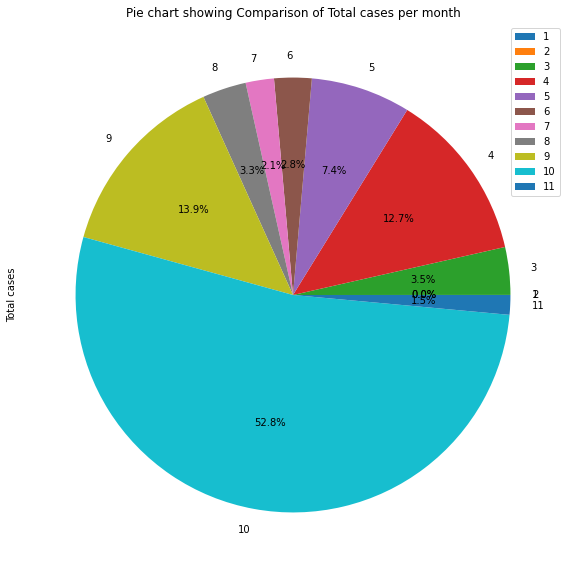

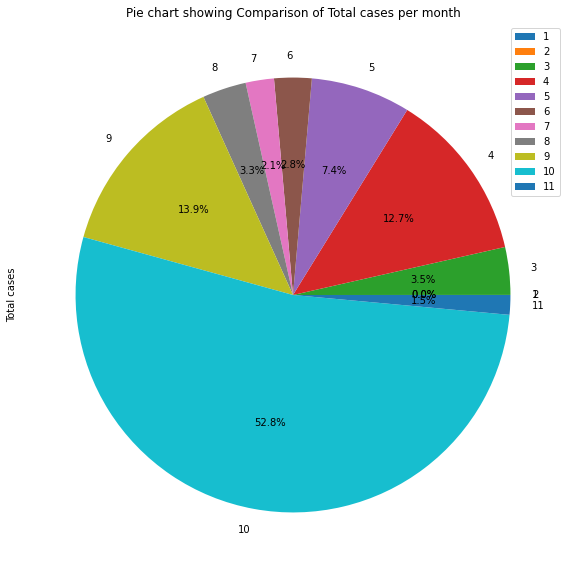

In [10]:
# Unit Testing

class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot4() is plot4()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Top 5 Areas with the highest number of cases in October the month with highest recorded case

In [11]:
def plot5():
  newCasesBySpecimenDate10=newCasesBySpecimenDate[newCasesBySpecimenDate['months']==10].   \
  groupby('areaName')['Total cases'].sum().to_frame().reset_index().sort_values('Total cases', ascending=False)   \
  
  newCasesBySpecimenDate10['perc']=(newCasesBySpecimenDate10['Total cases']/newCasesBySpecimenDate10['Total cases'].sum())*100
  colors_list = ['Red','Orange', 'Blue', 'Purple', 'Black']
  newCasesBySpecimenDate10=newCasesBySpecimenDate10.head(5)
  plt.figure(figsize=(12,8))
  ax=plt.barh(newCasesBySpecimenDate10['areaName'], newCasesBySpecimenDate10['Total cases'], color = colors_list)
  total=2396342
  for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        plt.annotate(percentage, (x, y))
  
  plt.xlabel('Total cases')
  plt.ylabel('AreaName')
  plt.title('Top 5 Areas with the highest number of cases in october, the month with highest recorded case')
  plt.show()

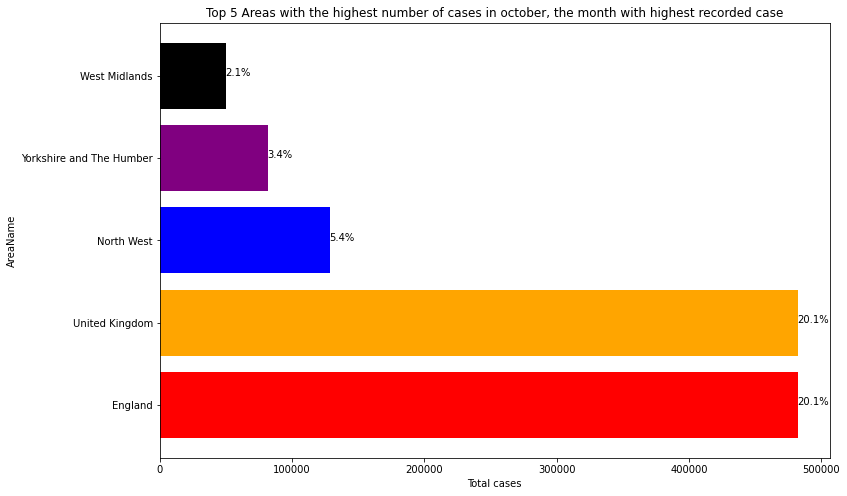

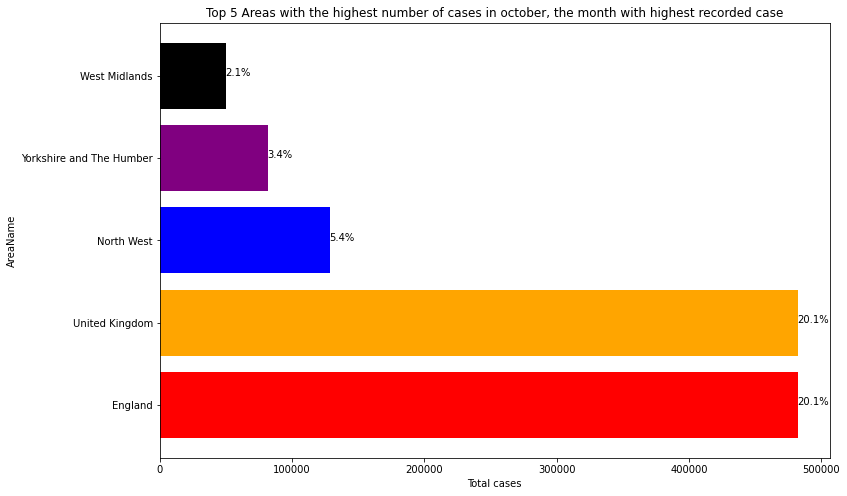

.
----------------------------------------------------------------------
Ran 1 test in 0.417s

OK


In [12]:
# Unit Testing

class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot5() is plot5()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Grouped Bar chart showing trends for Total newCases of people below age 59 and Total newCases of people above age 60 per month

In [13]:
def plot6():
  newCasesBySpecimenDate.groupby('months').sum()[['newCasesBySpecimenDate-0_59',	'newCasesBySpecimenDate-60+']].plot(kind='bar',figsize=(15,8) )
  plt.xlabel('Months')
  plt.ylabel('Total cases')
  plt.title('Total newCases of people below age 59 and Total newCases of people above age 60 per month')


.
----------------------------------------------------------------------
Ran 1 test in 0.205s

OK


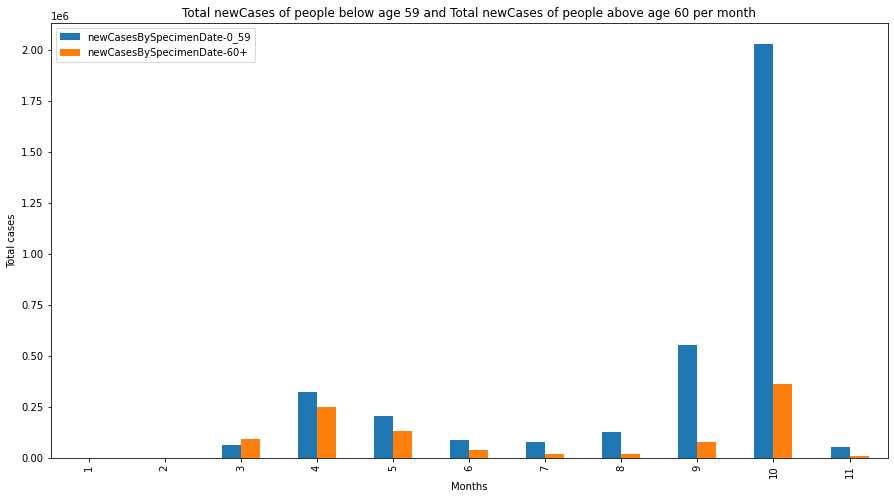

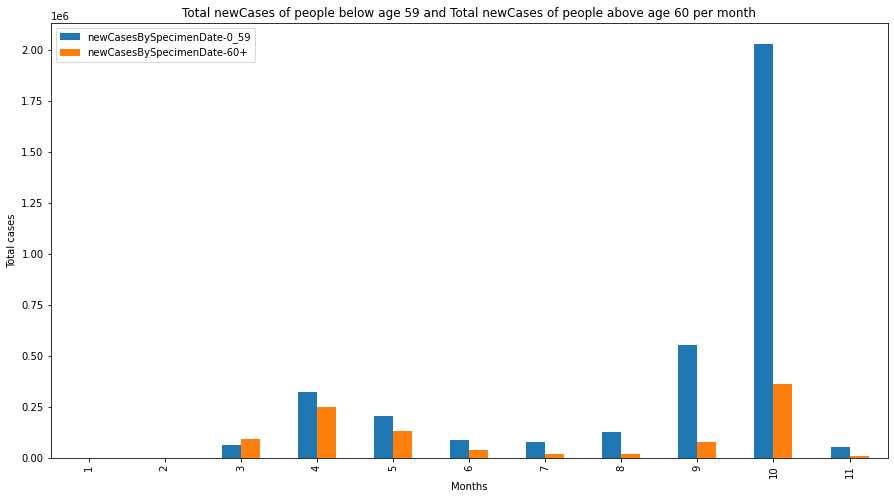

In [14]:
# Unit Testing

class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot6() is plot6()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Donut chart showing comparison of total cases of people between age 0-59 and people above 60

Total number of cases reported each day from 2020-02 to 2020-11

In [15]:
def plot7():
  newCasesBySpecimenDate[['date', 'Total cases']].set_index('date').plot(kind='line',figsize=(15,8), color='orange')

  plt.xlabel('Dates')
  plt.ylabel('Total cases')
  plt.title('Total number of cases reported each day from 2020-02 to 2020-11')



.
----------------------------------------------------------------------
Ran 1 test in 0.336s

OK


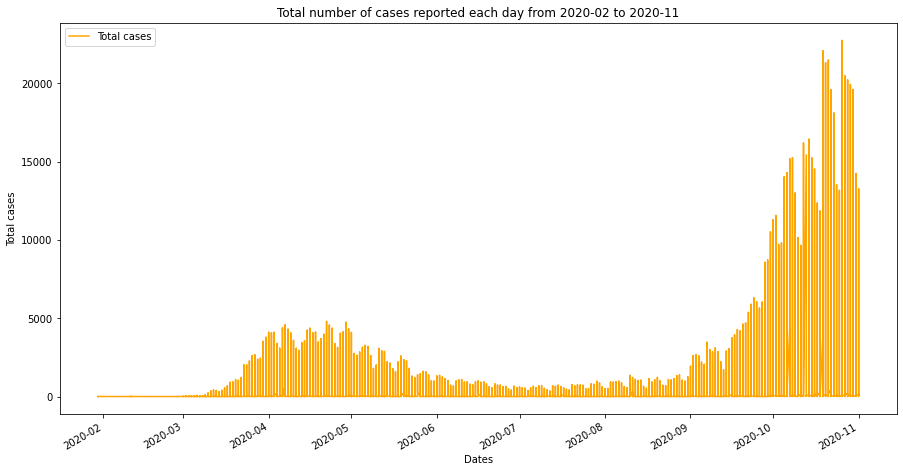

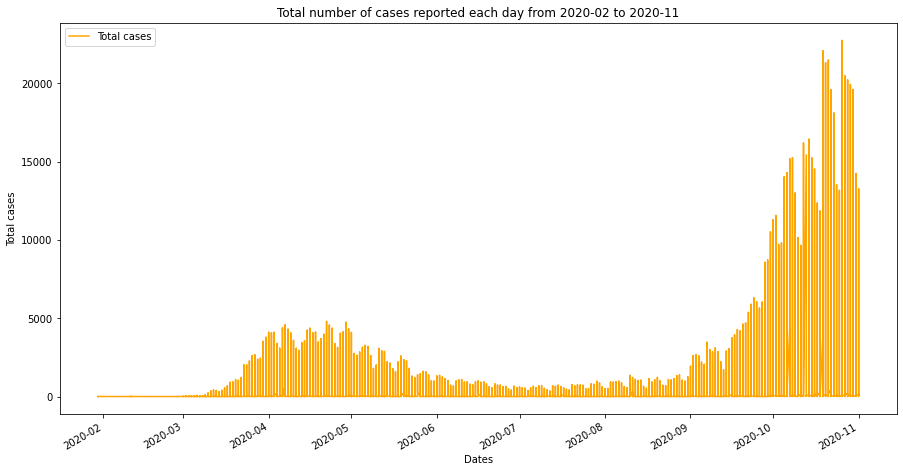

In [16]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot7() is plot7()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Total number of cases reported each week from from 2020-03-16 to 2020-11-01, the entire timeframe period of the whole dataset

In [17]:
def plot8():
  newCasesBySpecimenDate.groupby('weeks')['Total cases'].sum().plot(kind='line', figsize=(15,8), color='purple')
  plt.xlabel('Weeks')
  plt.ylabel('Total cases')
  plt.title('Total number of cases reported each week')


.
----------------------------------------------------------------------
Ran 1 test in 0.049s

OK


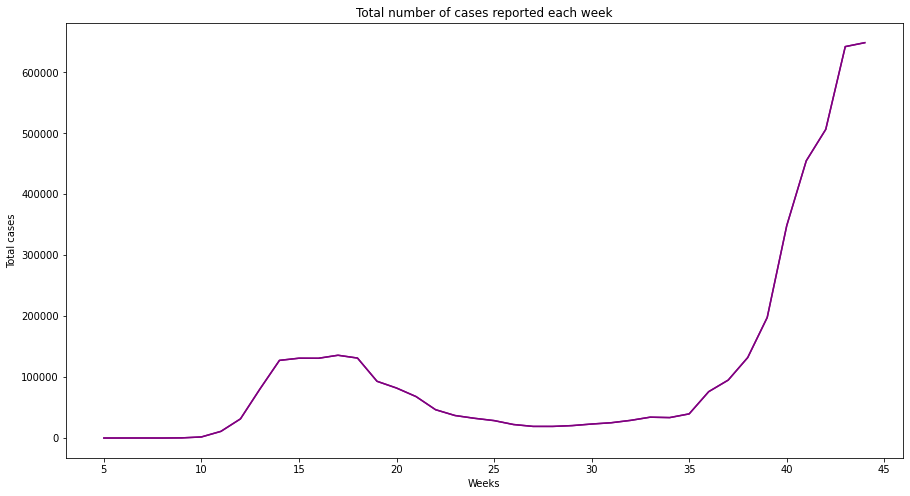

In [18]:
# Unit Testing

class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot8() is plot8()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Total number of cases reported each week for People below age 59 and people above age 59 from 2020-03-16 to 2020-11-01, the entire timeframe period of the whole dataset

In [19]:
def plot9():
  colors=['orange', 'blue']
  newCasesBySpecimenDate.groupby('weeks')['newCasesBySpecimenDate-60+', 'newCasesBySpecimenDate-0_59' ].sum().plot(kind='bar', figsize=(15,8),stacked=True, color=colors)
  plt.xlabel('Weeks')
  plt.ylabel('Total cases')
  plt.title('Total number of cases reported each week for People below age 59 and people above age 59')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
.
----------------------------------------------------------------------
Ran 1 test in 0.236s

OK


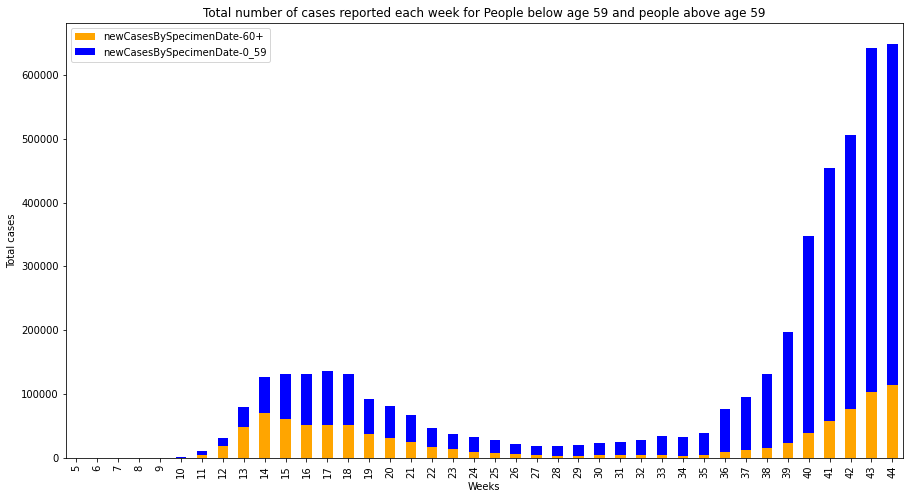

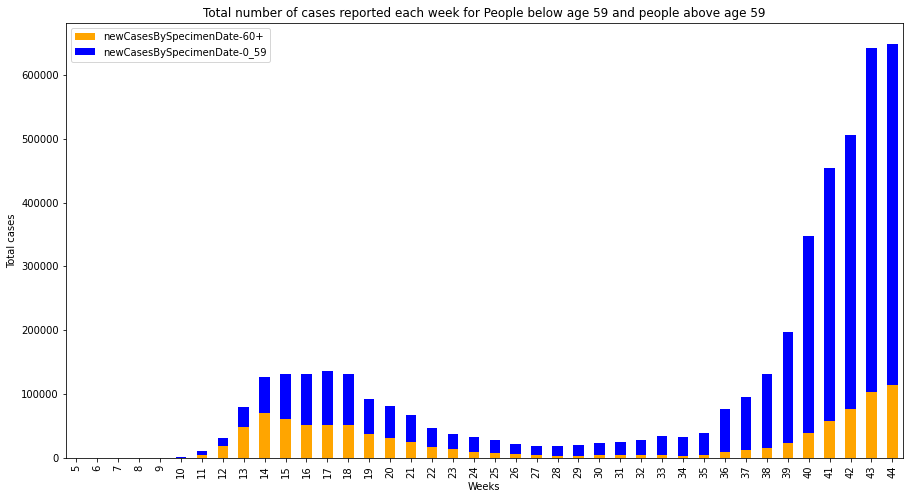

In [20]:
# Unit Testing

class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot9() is plot9()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)